In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
first_pick = pd.read_csv("first_picks_nba.csv")
first_pick.head(100)

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman[f],Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix^[g],Guard/Forward,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy^,Forward/Center,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts[h],Guard/Forward,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green[i],Guard/Forward,Duquesne,11.5,5.2,3.6
...,...,...,...,...,...,...,...,...
64,2016,Philadelphia 76ers,Ben Simmons^[ab],Forward/Guard,LSU,15.8,8.1,8.2
65,2017,Philadelphia 76ers,Markelle Fultz,Guard,Washington,7.1,3.1,3.8
66,2018,Phoenix Suns,Deandre Ayton,Center,Arizona,16.3,10.3,1.8
67,2019,New Orleans Pelicans,Zion Williamson^,Forward,Duke,22.5,6.3,2.1


In [26]:
first_pick['player']=first_pick['player'].str.split("^").str[0]
first_pick['player']=first_pick['player'].str.split("[").str[0]
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix,Guard/Forward,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy,Forward/Center,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts,Guard/Forward,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green,Guard/Forward,Duquesne,11.5,5.2,3.6


In [27]:
first_pick['position']=first_pick['position'].str.split('/').str[0]
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix,Guard,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy,Forward,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts,Guard,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green,Guard,Duquesne,11.5,5.2,3.6


In [28]:
first_pick = first_pick.astype({'draft': 'object'})
first_pick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   draft        69 non-null     object 
 1   selected_by  69 non-null     object 
 2   player       69 non-null     object 
 3   position     69 non-null     object 
 4   college      69 non-null     object 
 5   PPG          69 non-null     float64
 6   RPG          69 non-null     float64
 7   APG          69 non-null     float64
dtypes: float64(3), object(5)
memory usage: 4.4+ KB


In [29]:
first_pick['player']= first_pick['player'].astype(str) +"-"+ first_pick['draft'].astype(str)
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman-1952,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix-1953,Guard,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy-1954,Forward,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts-1955,Guard,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green-1956,Guard,Duquesne,11.5,5.2,3.6


<AxesSubplot:xlabel='position', ylabel='Count'>

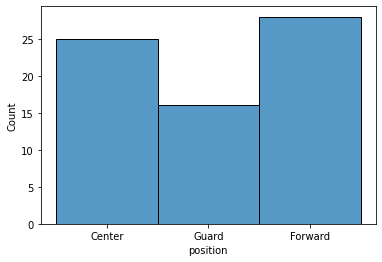

In [30]:
sns.histplot(data=first_pick, x="position")

In [57]:
import plotly.express as px

fig = px.bar(first_pick, y="player", x=["PPG", "APG", "RPG"], title="First Picks since 1952",width=1000, height=1500, labels=dict(player="Player Name"))
fig.show()

In [19]:
first_pick_10=first_pick[-10:]

In [20]:
import plotly.graph_objects as go

In [60]:
fig = go.Figure(data=[
    go.Bar(name='Points Per Game', x=first_pick_10['player'], y=first_pick_10['PPG'],),
    go.Bar(name='Points Per Game', x=first_pick_10['player'], y=first_pick_10['APG']),
    go.Bar(name='Rebounds Per Game', x=first_pick_10['player'], y=first_pick_10['RPG'],  marker_color = 'black')])
fig.update_layout(barmode='group',title="First pick over the last 10 years")

fig.show()